In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn.decomposition import TruncatedSVD

from tqdm.auto import tqdm


def reduction_dim(dict_lex, n_components=4):
    dict_lex_reduced = {}
    for k, v in dict_lex.items():
        svd = TruncatedSVD(n_components=n_components)
        svd.fit(np.array([e[1] for e in v]))
        dict_lex_reduced[k] = [(e[0], svd.transform([e[1]])[0]) for e in v]
    return dict_lex_reduced


def plot_clusters(liste_lex, cluster, N_CLUSTERS:int = None, type: str = "lex", print:bool = False, save:bool = True) -> None:
    plt.figure(figsize=(20, 20))

    if isinstance(cluster, AffinityPropagation):
        plt.title(f"AffinityPropagation")
        plt.scatter(
            [e[1][0] for e in liste_lex],
            [e[1][1] for e in liste_lex],
            c=cluster.labels_,
            cmap="viridis",
        )
        plt.scatter(
            [e[0] for e in cluster.cluster_centers_],
            [e[1] for e in cluster.cluster_centers_],
            c="black",
            s=200,
            alpha=0.5,
        )

    elif isinstance(cluster, KMeans):
        plt.title(f"KMeans")
        plt.scatter(
            [e[1][0] for e in liste_lex],
            [e[1][1] for e in liste_lex],
            c=cluster.labels_,
            cmap="viridis",
        )
        plt.scatter(
            [e[0] for e in cluster.cluster_centers_],
            [e[1] for e in cluster.cluster_centers_],
            c="black",
            s=200,
            alpha=0.5,
        )

    elif isinstance(cluster, AgglomerativeClustering):
        plt.title(f"AgglomerativeClustering")
        plt.scatter(
            [e[1][0] for e in liste_lex],
            [e[1][1] for e in liste_lex],
            c=cluster.labels_,
            cmap="viridis",
        )


    elif isinstance(cluster, SpectralClustering):
        plt.title(f"SpectralClustering")
        plt.scatter(
            [e[1][0] for e in liste_lex],
            [e[1][1] for e in liste_lex],
            c=cluster.labels_,
            cmap="viridis",
        )

    elif isinstance(cluster, DBSCAN):
        plt.title(f"DBSCAN")
        plt.scatter(
            [e[1][0] for e in liste_lex],
            [e[1][1] for e in liste_lex],
            c=cluster.labels_,
            cmap="viridis",
        )
        plt.scatter(
            [e[0] for e in cluster.cluster_centers_],
            [e[1] for e in cluster.cluster_centers_],
            c="black",
            s=200,
            alpha=0.5,
        )



    else:
        raise ValueError("Cluster inconnu")


    if N_CLUSTERS is not None:
        title = f"{cluster.__class__.__name__}_{N_CLUSTERS}_clusters_{type}"
    else:
        title = f"{cluster.__class__.__name__}_{type}"

    # plt.legend()
    if save: plt.savefig(f"imgs/clusters/{title}.png")
    if print: plt.show()
    plt.close()


with open("collection_textes.pickle", mode="rb") as f:
    collection_textes = pickle.load(f)

N_COMPONENTS = 2


In [2]:
allecarts = [e.ecarts for e in collection_textes]
alllex = [e.lexicalites for e in collection_textes]

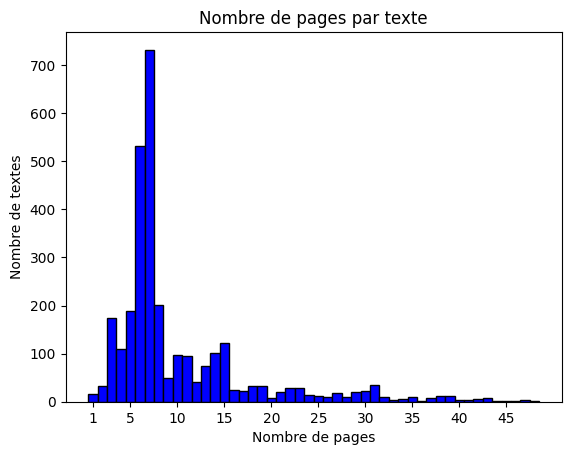

In [3]:
stat = [len(e) for e in allecarts if len(e) < 50]
stat1 = [len(e) for e in alllex if len(e) < 50]
# plt.hist(stat, bins=50, range=(0, 50), color="blue", edgecolor="black")
plt.hist(stat1, bins=np.arange(1, 50) - 0.5, range=(0, 50), color="blue", edgecolor="black")
plt.xticks([1] + list(range(0, 50, 5)[1:]))
plt.figsize = (20, 20)
plt.xlabel("Nombre de pages")
plt.ylabel("Nombre de textes")
plt.title("Nombre de pages par texte")
plt.savefig("imgs/histo_nb_pages.png")
plt.show()


In [4]:
dict_lex = {taile: [] for taile in range(1000)}
for i, lex in enumerate(alllex):
    dict_lex[len(lex)].append((i, lex))

dict_lex = {k: v for k, v in dict_lex.items() if v}

# _ = [print(k, len(v)) for k, v in dict_lex.items()]


In [5]:
dict_ecarts = {taile: [] for taile in range(1000)}
for i, ecart in enumerate(allecarts):
    dict_ecarts[len(ecart)].append((i, ecart))

dict_ecarts = {k: v for k, v in dict_ecarts.items() if v}

# _ = [print(k, len(v)) for k, v in dict_ecarts.items()]

In [6]:
# dict_lex_sub_40 = {k: v for k, v in dict_lex.items() if k < 40}
# dict_lex_sup_2 = {k: v for k, v in dict_lex.items() if k > 2}
dict_lex_sup_n_sub = {k: v for k, v in dict_lex.items() if N_COMPONENTS < k < 80}
dict_ecarts_sup_n_sub = {k: v for k, v in dict_ecarts.items() if N_COMPONENTS < k < 80}


In [7]:
dict_lex_reduced = reduction_dim(dict_lex_sup_n_sub, n_components=N_COMPONENTS)
dict_ecarts_reduced = reduction_dim(dict_ecarts_sup_n_sub, n_components=N_COMPONENTS)


/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_truncated_svd.py:268: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var
/home/marceau/PycharmProjects/memoire/venv/lib64/python3.11/site-packages/sklearn/decomposition/_tru

In [8]:
liste_lex = [e for v in dict_lex_reduced.values() for e in v if len(e[1]) == 2]
liste_ecarts = [e for v in dict_ecarts_reduced.values() for e in v if len(e[1]) == 2]


In [9]:
aff = AffinityPropagation(damping = 0.9, max_iter = 1000).fit(np.array([e[1] for e in liste_lex]))
aff2 = AffinityPropagation(damping = 0.9, max_iter = 1000).fit(np.array([e[1] for e in liste_ecarts]))

plot_clusters(liste_lex, aff)
plot_clusters(liste_ecarts, aff2, type="ecarts")


N_CLUSTERS = 10
for N_CLUSTERS in tqdm(range(2, 20)):

    kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(np.array([e[1] for e in liste_lex]))
    kmeans2 = KMeans(n_clusters=N_CLUSTERS, random_state=0, n_init="auto").fit(np.array([e[1] for e in liste_ecarts]))

    plot_clusters(liste_lex, kmeans, N_CLUSTERS)
    plot_clusters(liste_ecarts, kmeans2, N_CLUSTERS, type="ecarts")

    agg = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit(np.array([e[1] for e in liste_lex]))
    agg2 = AgglomerativeClustering(n_clusters=N_CLUSTERS).fit(np.array([e[1] for e in liste_ecarts]))

    plot_clusters(liste_lex, agg, N_CLUSTERS)
    plot_clusters(liste_ecarts, agg2, N_CLUSTERS, type="ecarts")

    spec = SpectralClustering(n_clusters=N_CLUSTERS).fit(np.array([e[1] for e in liste_lex]))
    spec2 = SpectralClustering(n_clusters=N_CLUSTERS).fit(np.array([e[1] for e in liste_ecarts]))

    plot_clusters(liste_lex, spec, N_CLUSTERS)
    plot_clusters(liste_ecarts, spec2, N_CLUSTERS, type="ecarts")


  0%|          | 0/18 [00:00<?, ?it/s]